<h1> Title </h1>

In [14]:
import pandas as pd
import os
import tqdm
import warnings
warnings.filterwarnings('ignore')

In [15]:
pd.options.display.max_rows = 100
# pd.options.display.max_colwidth = 70
pd.set_option('precision', 2)

<h2>First, we combine all patients datasets into one large dataset </h2>

In [16]:
# data_path = '/home/student/Early_Prediction_of_Sepsis/data/train/'
# patients = os.listdir('data/train')
# df = pd.read_csv(os.path.join(data_path,patients[0]),delimiter ='|')
# df['ID'] = patients[0].split('_')[-1].split('.')[0]
# new_df = df[df['SepsisLabel']==0]
# if max(df['SepsisLabel'])==1:
#     new_df=new_df.append(df[df['SepsisLabel']==1][:1])
#     new_df['Label'] = [1]*new_df.shape[0]
# else:
#     new_df['Label'] = [0]*new_df.shape[0]
# stats = new_df.describe()
# std = stats[(stats.index=='std')|(stats.index=='mean')]
# std['ID'] = patients[0].split('_')[-1].split('.')[0]
# for patient in tqdm.tqdm(patients[1:]):
#     patient_path = os.path.join(data_path,patient)
#     patient_number = patient.split('_')[-1].split('.')[0]
#     tmp_df = pd.read_csv(os.path.join(data_path,patient_path),delimiter ='|')
#     tmp_df['ID'] = patient_number
#     # df = df.append(tmp_df)
#     tmp_new_df = tmp_df[tmp_df['SepsisLabel']==0]
#     if max(tmp_df['SepsisLabel'])==1:
#         tmp_new_df=tmp_new_df.append(tmp_df[tmp_df['SepsisLabel']==1][:1])
#         tmp_new_df['Label'] = [1]*tmp_new_df.shape[0]
#     else:
#         tmp_new_df['Label'] = [0]*tmp_new_df.shape[0]
#     tmp_stats = tmp_new_df.describe()
#     tmp_std = tmp_stats[(tmp_stats.index=='std')|(tmp_stats.index=='mean')]
#     tmp_std['ID'] = patient_number
#     std = std.append(tmp_std)
#     new_df = new_df.append(tmp_new_df)

In [17]:
# # df.to_csv('train_data_combined.csv')
# new_df.to_csv('filtered_train_data_combined.csv')
# std.to_csv('stds_train_data.csv')

In [18]:
df = pd.read_csv('/home/student/filtered_train_data_combined.csv')
std = pd.read_csv('/home/student/stds_train_data.csv')

In [19]:
demo_cols = ['ID','Age','Gender','Label','ICULOS']
demographic_df = df[demo_cols].groupby(by='ID').max()

In [20]:
from matplotlib import pyplot as plt
import seaborn as sns;
sns.set(style="white", color_codes=True)
def plot_results(cols,rows, cols_names,df, type, title=None, figsize=(20,20)):
    fig,axes = plt.subplots(rows,cols, figsize=figsize)
    fig.tight_layout(pad=5.0)
    axes = axes.ravel()
    for i,col in enumerate(cols_names):
        if col!='Label':
            if type=='hist':
                sns.histplot(x=col,hue='Label',data=df, multiple="dodge", ax=axes[i])
                axes[i].set_title(col+' distribution by label')
            if type=='dist':
                sns.distplot(df[df['Label']==1][col], color='r',ax=axes[i])
                sns.distplot(df[df['Label']==0][col],ax=axes[i])
                axes[i].set_title(col+' distribution by label')
            elif type=='ts':
                axes[i].plot(df[df['Label']==1]['time_bm'],df[df['Label']==1][col], color='r')
                axes[i].plot(df[df['Label']==0]['time_bm'],df[df['Label']==0][col], color='b')
                axes[i].set_title(col+' change over time by label')
        else:
            sns.histplot(x=col,data=df, color='g',ax=axes[i])
            axes[i].set_title(col+' distribution')
    if title:
        plt.suptitle(title)

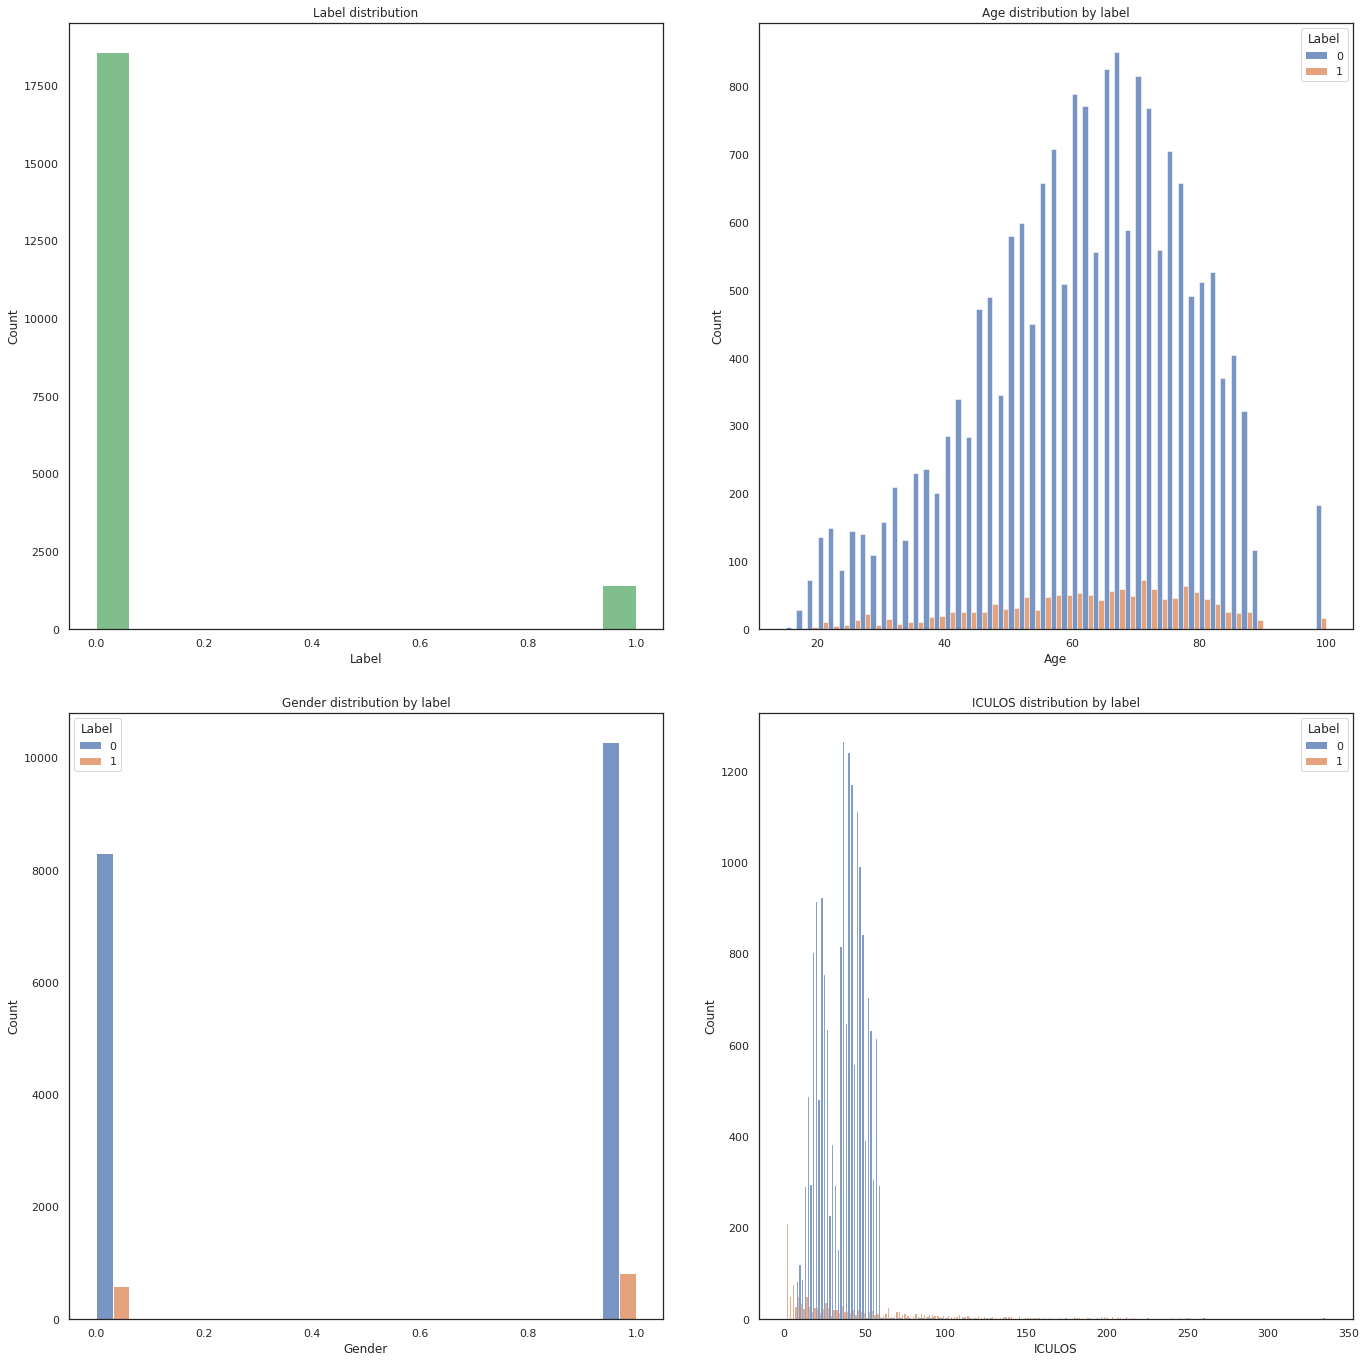

In [21]:
plot_results(2,2,['Label','Age','Gender','ICULOS'],demographic_df,'hist')

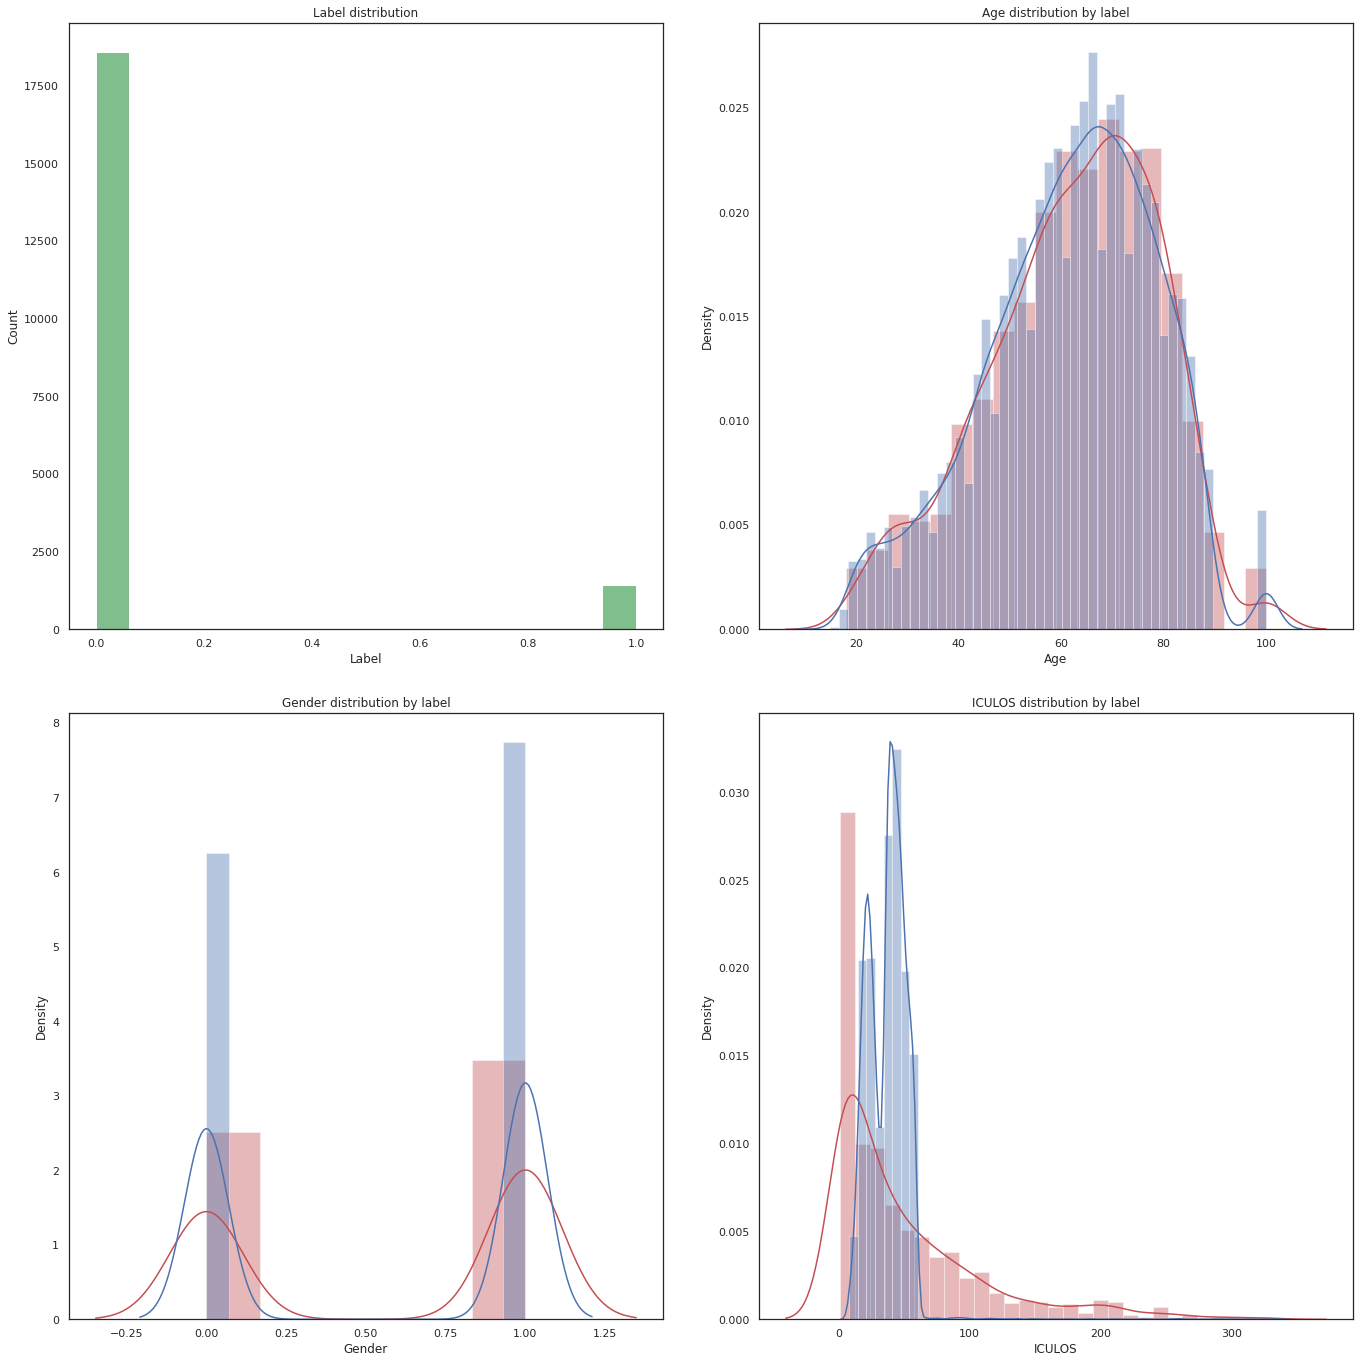

In [22]:
plot_results(2,2,['Label','Age','Gender','ICULOS'],demographic_df,'dist')

In [23]:
std

,Unnamed: 0,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,...,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Label,ID
0,mean,61.22,97.27,36.86,124.16,58.14,37.21,22.77,NaN,NaN,...,78.00,7.70e+01,0.0,NaN,NaN,-6.80e+02,26.50,0.00,0.0,10022
1,std,3.94,1.08,0.60,11.94,10.09,14.41,4.03,NaN,NaN,...,0.00,0.00e+00,0.0,NaN,NaN,2.30e-13,15.15,0.00,0.0,10022
2,mean,102.00,98.00,NaN,113.50,68.16,NaN,19.50,NaN,NaN,...,NaN,8.05e+01,0.0,0.0,1.0,-2.53e+02,2.00,0.33,1.0,19816
3,std,7.07,1.41,NaN,6.36,4.48,NaN,0.71,NaN,NaN,...,NaN,0.00e+00,0.0,0.0,0.0,0.00e+00,1.00,0.58,0.0,19816
4,mean,90.02,98.92,37.03,112.14,83.63,NaN,14.92,NaN,NaN,...,266.50,5.95e+01,1.0,NaN,NaN,-3.00e-02,27.50,0.00,0.0,12343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,std,8.33,1.10,0.56,9.68,9.56,NaN,2.38,NaN,NaN,...,0.71,2.16e-14,0.0,NaN,NaN,1.05e-17,11.98,0.00,0.0,18916
39996,mean,66.02,97.00,36.96,136.26,65.14,44.53,14.30,NaN,-0.29,...,209.50,6.98e+01,1.0,0.0,1.0,3.81e+00,20.00,0.00,0.0,19002
39997,std,7.24,1.75,0.44,15.30,8.22,6.22,4.21,NaN,1.89,...,7.72,0.00e+00,0.0,0.0,0.0,1.35e-15,9.67,0.00,0.0,19002
39998,mean,113.86,95.09,37.09,155.18,121.10,100.78,20.90,NaN,NaN,...,85.50,3.70e+01,1.0,1.0,0.0,-5.40e+01,19.00,0.00,0.0,8234


HR -  Heart rate (beats per minute)
Temp -  Temperature (Deg C)
Resp -  Respiration rate (breaths per minute)
WBC -  Leukocyte count (count*10^3/µL)


קיומו של אלח דם מאושר אם ... הוכח כי שניים או יותר מהקריטריונים של תגובה דלקתית מערכתית (Systemic Inflammatory Response Syndrome – SIRS) מתקיימים:

דופק הגבוה מ-90 פעימות לדקה.
חום הגוף מתחת ל-36 מעלות צלזיוס או מעל 38 מעלות צלזיוס.
נשימת יתר (היפרוונטילציה), למעלה מ-20 נשימות לדקה, או לחץ פחמן דו-חמצני הנמוך מ-32mmHg בבדיקת גזים בדם.
מספר כדוריות דם לבנות קטן מ-4,000 תאים לכל מ"מ מעוקב של דם, או גדול מ-12,000 לאותה יחידת נפח, או מהווה למעלה מעשירית ממספר תאי מסילת הנבט (תאי דם לבנים לא בשלים).
צמרמורות


Platelets -  (count*10^3/µL)

A person may have sepsis if he or she has:
A high or low white blood cell count
A low platelet count

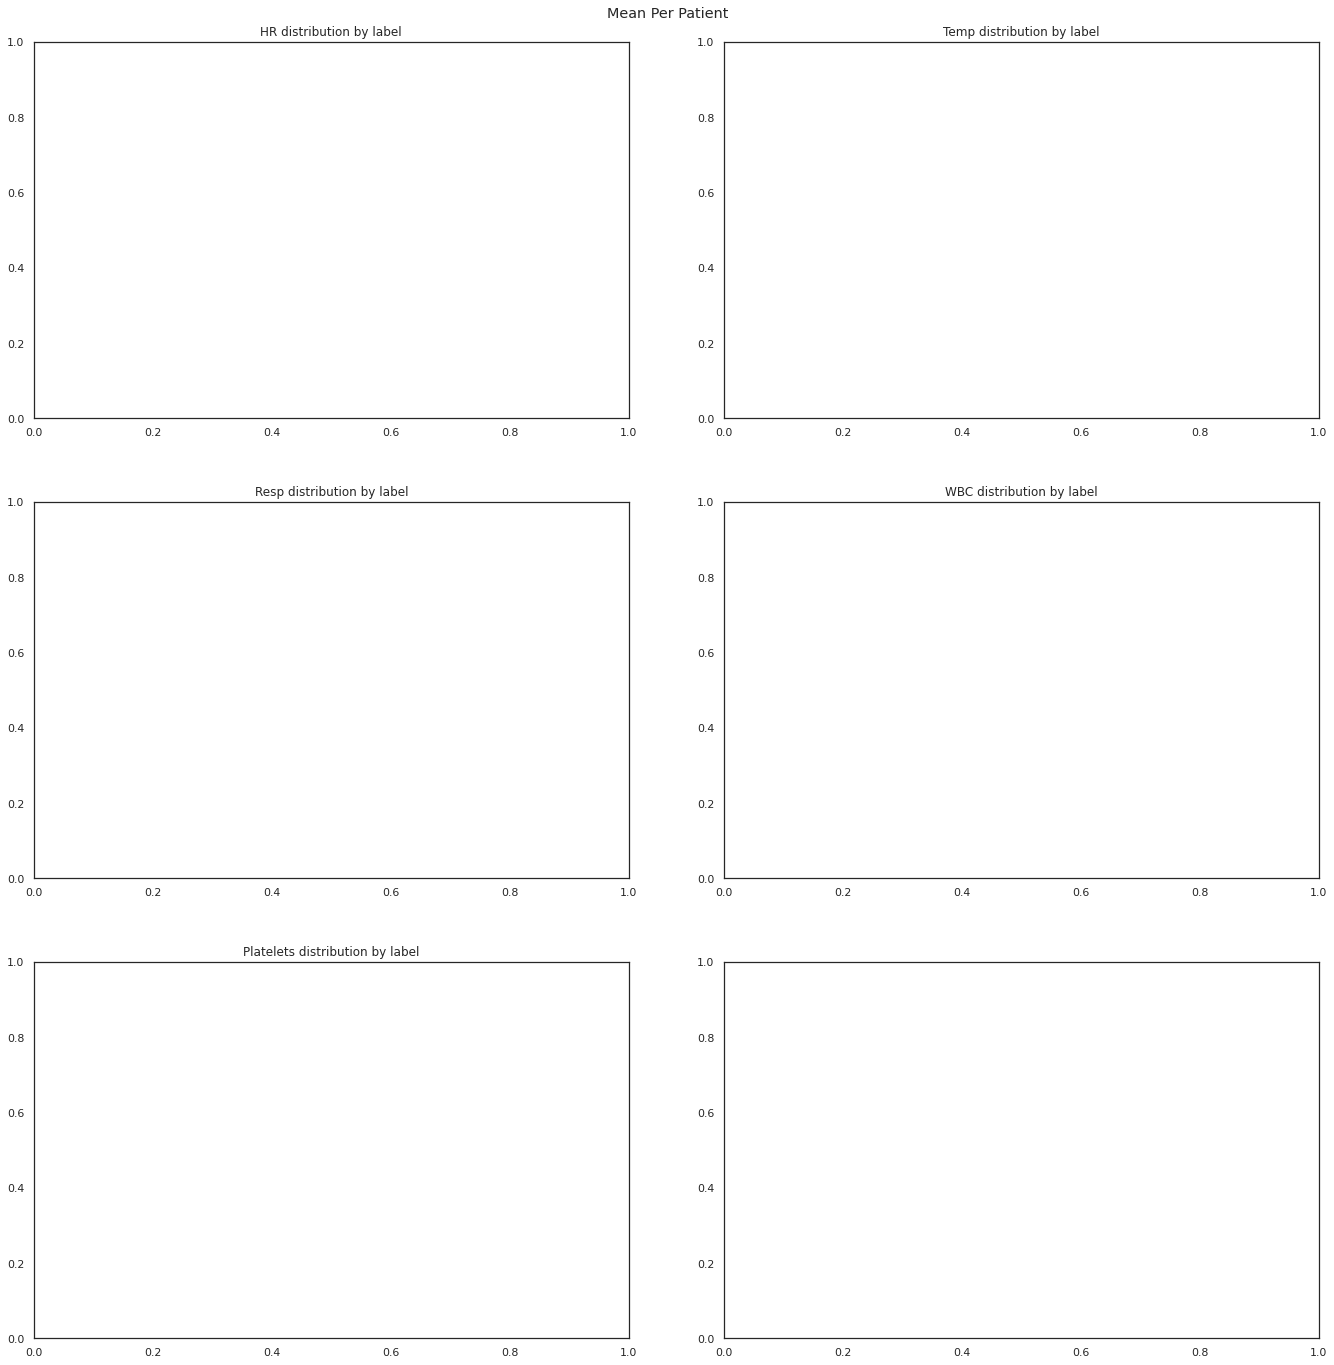

In [24]:
plot_results(2,3,['HR','Temp','Resp','WBC','Platelets'],std[std.index=='mean'],'hist','Mean Per Patient')

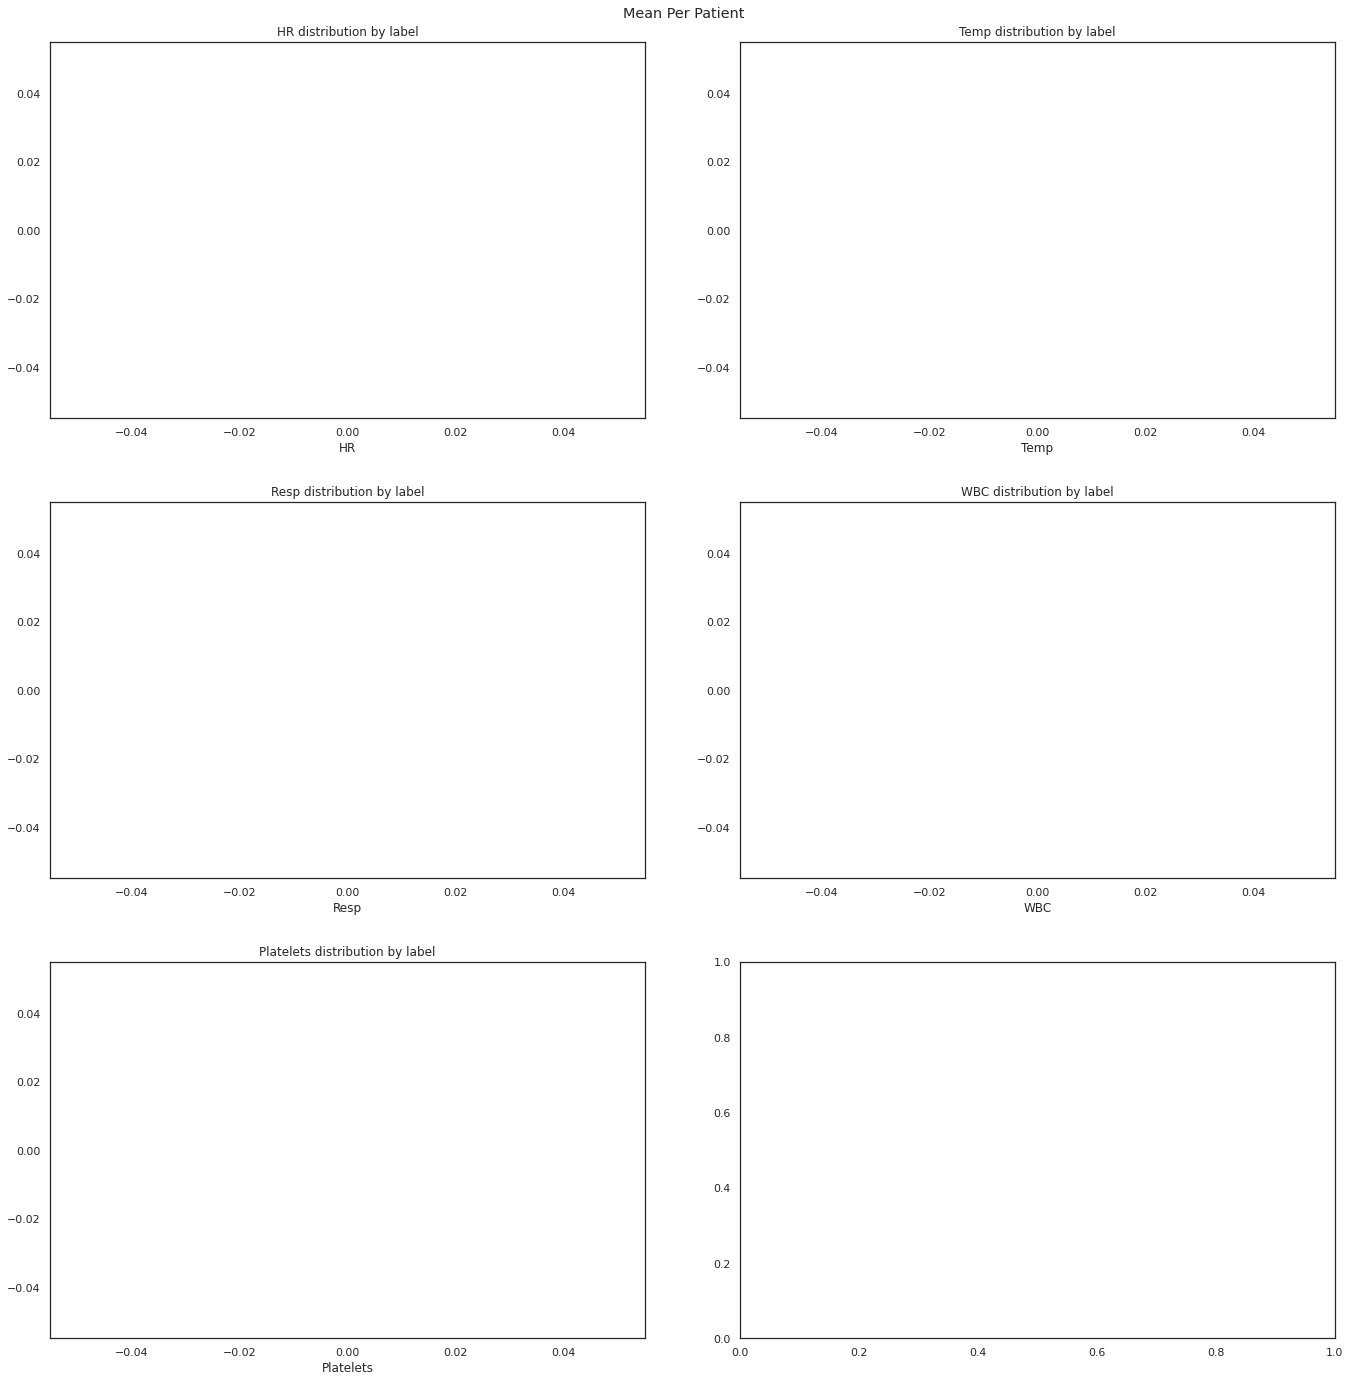

In [25]:
plot_results(2,3,['HR','Temp','Resp','WBC','Platelets'],std[std.index=='mean'],'dist','Mean Per Patient')

In [26]:
for patient in patients:
    patient_df = df[df.ID==patient]
    label = patient_df['Label'].values[0]
    color = 'r' if label==1 else 'b'
    plt.plot(patient_df['ICULOS'],patient_df['HR'], color=color)
# sns.lineplot(data=df, x="ICULOS", y="HR", hue="Label", variable='ID')

NameError: name 'patients' is not defined

In [27]:
max_los = df[['ID','ICULOS']].groupby(by='ID').max().rename(columns={'ICULOS':'Max_ICULOS'})
max_los

,Max_ICULOS
ID,
0,23
1,26
2,38
3,48
4,24
...,...
19995,29
19996,43
19997,15


In [28]:
df=df.join(max_los,on='ID',how='left')
df['time_bm'] =  df['ICULOS']-df['Max_ICULOS']
df

,Unnamed: 0,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,...,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,ID,Label,Max_ICULOS,time_bm
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,-679.93,1,0,10022,0,52,-51
1,1,58.5,96.0,NaN,133.0,54.0,30.0,28.5,NaN,NaN,...,0,NaN,NaN,-679.93,2,0,10022,0,52,-50
2,2,54.0,97.0,36.4,128.0,58.0,36.0,23.0,NaN,NaN,...,0,NaN,NaN,-679.93,3,0,10022,0,52,-49
3,3,58.0,97.0,NaN,116.0,50.0,28.0,21.0,NaN,NaN,...,0,NaN,NaN,-679.93,4,0,10022,0,52,-48
4,4,58.0,98.0,NaN,128.0,65.0,49.0,32.0,NaN,NaN,...,0,NaN,NaN,-679.93,5,0,10022,0,52,-47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
754812,32,85.0,92.0,NaN,116.0,93.0,79.0,20.0,NaN,NaN,...,1,1.0,0.0,-54.03,33,0,8234,0,37,-4
754813,33,87.0,94.0,36.9,137.0,107.0,91.0,26.0,NaN,NaN,...,1,1.0,0.0,-54.03,34,0,8234,0,37,-3
754814,34,121.0,97.0,NaN,NaN,NaN,NaN,22.0,NaN,NaN,...,1,1.0,0.0,-54.03,35,0,8234,0,37,-2
754815,35,95.0,91.0,NaN,138.5,107.0,87.5,20.0,NaN,NaN,...,1,1.0,0.0,-54.03,36,0,8234,0,37,-1


In [29]:
df[['ID','time_bm']].groupby(by='ID').min().describe()

,time_bm
count,20000.00
mean,-36.74
std,21.76
min,-335.00
25%,-46.00
50%,-37.00
75%,-23.00
max,0.00


In [30]:
measures = ['HR','Temp','Resp','WBC','Platelets']
plot_results(2,3,measures,df_10hr,'ts')

NameError: name 'df_10hr' is not defined

In [ ]:
df[df['time_bm']>=-10].info()

In [31]:
missing = pd.DataFrame(df[(df['time_bm']>=-10)&(df['Label']==0)].notna().sum(axis = 0).sort_values(ascending=False) / len(df[(df['time_bm']>=-10)&(df['Label']==0)]) * 100)
missing_1 = pd.DataFrame(df[(df['time_bm']>=-10)&(df['Label']==1)].notna().sum(axis = 0).sort_values(ascending=False) / len(df[(df['time_bm']>=-10)&(df['Label']==1)]) * 100)
missing[1] = missing_1[0]
vals = missing[~missing.index.isin(['Label','SepsisLabel','time_bm','Max_ICULOS','Unnamed: 0','ID'])].index.values


In [32]:
missing[missing.index.isin(vals[30:40])]

,0,1
PTT,1.88,3.67
SaO2,1.64,4.34
EtCO2,1.39,8.53
AST,1.03,1.96
Lactate,1.02,4.54
Alkalinephos,1.02,1.93
Bilirubin_total,0.98,1.61
TroponinI,0.63,0.71
Fibrinogen,0.31,0.86
Bilirubin_direct,0.10,0.19


In [33]:
df_mean = df.groupby(by='ID').mean()

In [34]:
missing_mean = pd.DataFrame(df_mean[df_mean['Label']==0].notna().sum(axis = 0).sort_values(ascending=False) / len(df_mean[df_mean['Label']==0]) * 100)
missing_mean_1 = pd.DataFrame(df_mean[df_mean['Label']==1].notna().sum(axis = 0).sort_values(ascending=False) / len(df_mean[df_mean['Label']==1]) * 100)
missing_mean[1] = missing_mean_1[0]

In [35]:
vals = missing_mean[~missing_mean.index.isin(['Label','SepsisLabel','time_bm','Max_ICULOS','Unnamed: 0','ID'])].index.values

missing_mean

,0,1
Unnamed: 0,100.00,100.00
Age,100.00,100.00
Max_ICULOS,100.00,100.00
Label,100.00,100.00
SepsisLabel,100.00,100.00
ICULOS,100.00,100.00
HospAdmTime,100.00,100.00
Gender,100.00,100.00
time_bm,100.00,100.00
HR,99.98,87.63


In [36]:
df_mean_10hr = df[df['time_bm']>-10].groupby(by='ID').mean()

In [37]:
missing_mean_10hr = pd.DataFrame(df_mean_10hr[df_mean_10hr['Label']==0].notna().sum(axis = 0).sort_values(ascending=False) / len(df_mean_10hr[df_mean_10hr['Label']==0]) * 100)
missing_mean_1_10hr = pd.DataFrame(df_mean_10hr[df_mean_10hr['Label']==1].notna().sum(axis = 0).sort_values(ascending=False) / len(df_mean_10hr[df_mean_10hr['Label']==1]) * 100)
missing_mean_10hr[1] = missing_mean_1_10hr[0]

# missing_mean[~missing_mean.index.isin(['Label','SepsisLabel','time_bm','Max_ICULOS','Unnamed: 0','ID'])].index.values

missing_mean_10hr[~missing_mean_10hr.index.isin(['Label','SepsisLabel','time_bm','Max_ICULOS','Unnamed: 0','ID'])]

,0,1
Age,100.00,100.00
ICULOS,100.00,100.00
HospAdmTime,100.00,100.00
Gender,100.00,100.00
HR,99.55,86.78
O2Sat,98.90,86.43
MAP,98.88,86.36
Resp,98.70,84.95
Temp,97.39,81.63
SBP,96.86,80.00


In [38]:
vals = missing_mean_10hr[~missing_mean_10hr.index.isin(['Label','SepsisLabel','time_bm','Max_ICULOS','Unnamed: 0','ID'])].index.values
missing_mean_10hr[missing_mean_10hr.index.isin(vals[30:])]

,0,1
BaseExcess,12.10,30.11
SaO2,8.84,17.31
Bilirubin_total,8.79,12.51
AST,8.68,12.79
Alkalinephos,8.60,12.58
Lactate,5.67,20.42
TroponinI,5.05,5.16
Fibrinogen,2.29,4.52
EtCO2,2.04,8.69
Bilirubin_direct,0.87,1.27


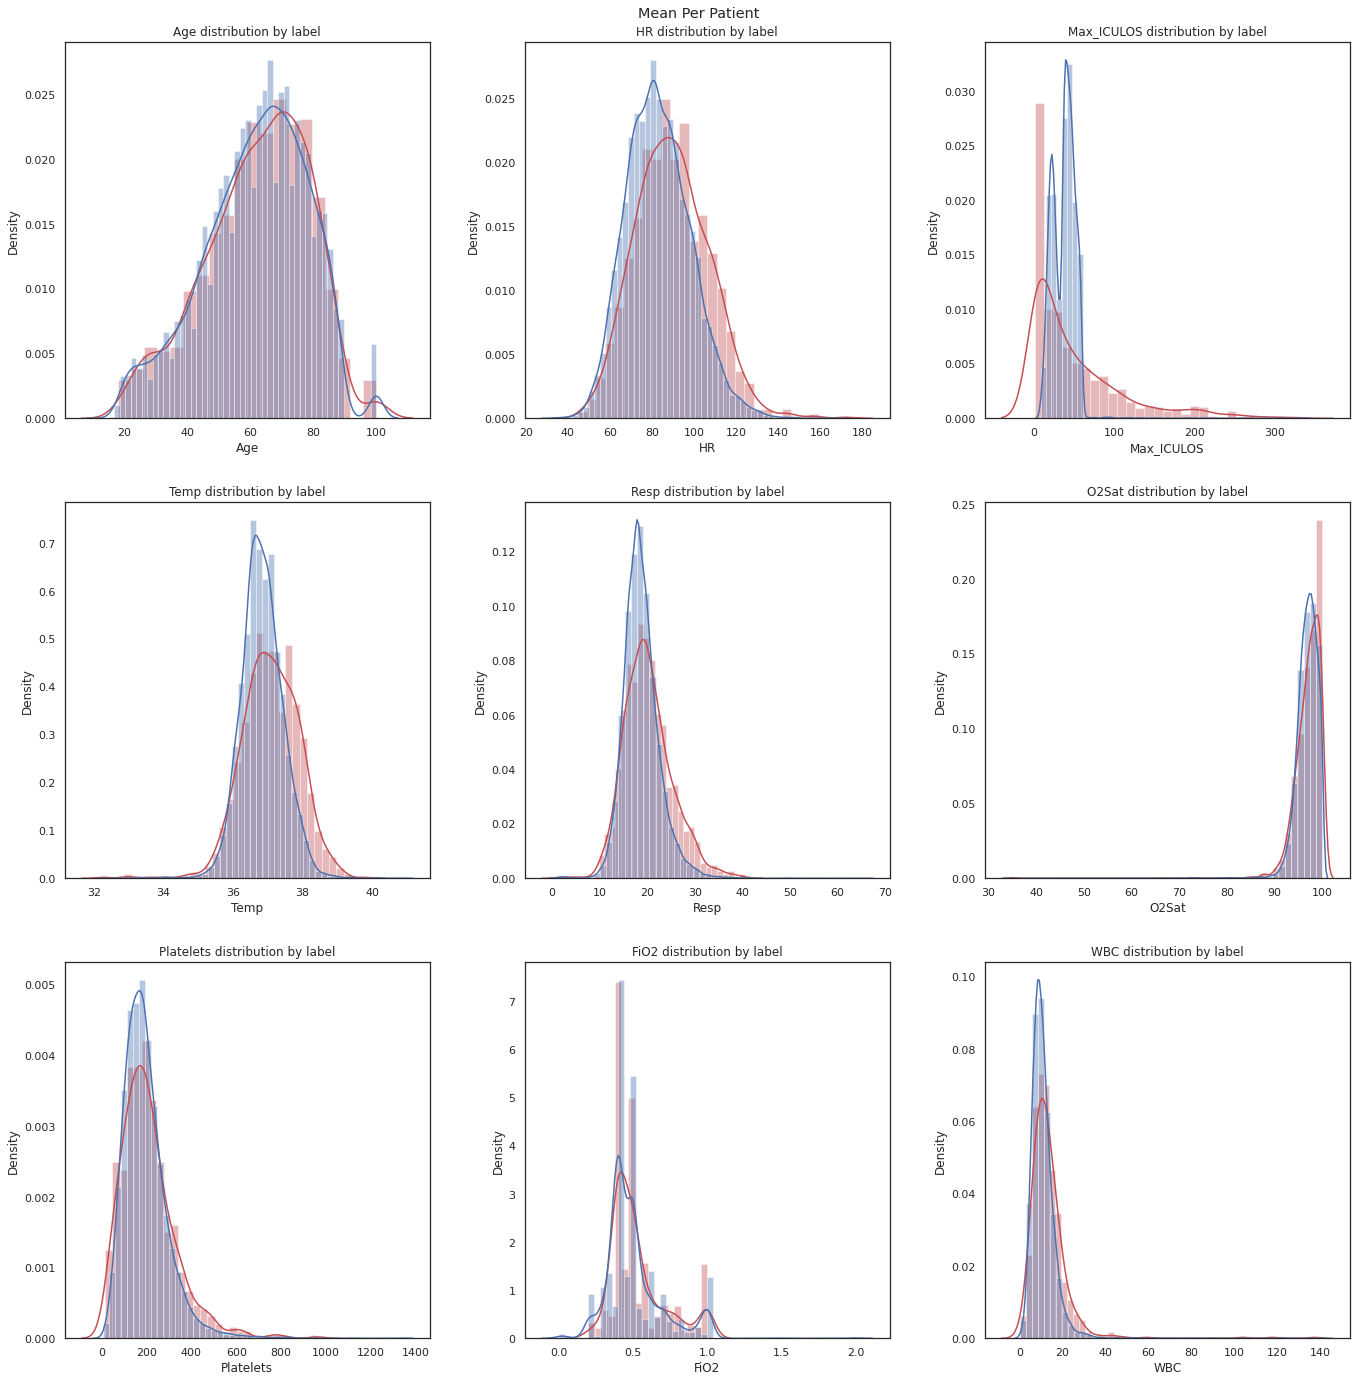

In [39]:
plot_results(3,3,['Age','HR','Max_ICULOS','Temp','Resp','O2Sat','Platelets','FiO2','WBC'],df_mean_10hr,'dist','Mean Per Patient')

In [40]:
df[df['time_bm']>-10].columns

Index(['Unnamed: 0', 'HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp',
       'EtCO2', 'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST',
       'BUN', 'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine',
       'Bilirubin_direct', 'Glucose', 'Lactate', 'Magnesium', 'Phosphate',
       'Potassium', 'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel', 'ID', 'Label', 'Max_ICULOS',
       'time_bm'],
      dtype='object')

In [41]:
tmp = df.copy()
tmp['Unit3'] = ( (1*(tmp['Unit1']+tmp['Unit2'])<1) |
                      (tmp['Unit1'].isna() & tmp['Unit2'].isna()) )*1
tmp['Unit1'][tmp['Unit1'].isna()] = 0
tmp['Unit2'][tmp['Unit2'].isna()] = 0
# tmp[['Unit1','Unit2','Unit3']]

aggregated_df_10h = tmp[tmp['time_bm']>-10].groupby(['ID', 'Label','Gender']).agg({
                                                        'Unit1': 'max',\
                                                        'Unit2': 'max',\
                                                        'Unit3': 'max',\
                                                        'ICULOS': 'max',\
                                                        'HR': ['median', 'max'],\
                                                        'MAP': ['median', 'min'],\
                                                        'O2Sat': ['mean'],\
                                                        'Resp': ['median', 'max'],\
                                                        'SBP': ['median', 'min'],\
                                                        'Hct': ['median', 'min'],\
                                                        'Potassium': 'mean',\
                                                        'Glucose': 'mean',\
                                                        'Temp': ['mean', 'min'],\
                                                        'DBP': 'mean',\
                                                        'WBC': ['median', 'min'],\
                                                        'EtCO2': 'mean',\
                                                        'BaseExcess': 'mean',\
                                                        'HCO3': 'mean',\
                                                        'FiO2': 'mean',\
                                                        'SaO2': 'mean',\
                                                        'AST': 'mean',\
                                                        'Lactate': 'mean',\
                                                        'var': 'mean',\
                                                        'Magnesium': 'mean',\
                                                        'Phosphate': 'mean',\
                                                        'TroponinI': 'mean',\
                                                        'Hgb': 'mean',\
                                                        'PTT': 'mean',\
                                                        'Platelets': 'mean',\
                                                        'Age': 'mean',\
                                                        'HospAdmTime': 'mean',\
                                                        # f'{window_size}w_sum_BaseExcess': 'mean',\
                                                        # f'{window_size}w_sum_FiO2': 'mean',\
                                                        # f'{window_size}w_sum_pH': 'mean',\
                                                        # f'{window_size}w_sum_PaCO2': 'mean',\
                                                        # f'{window_size}w_sum_Glucose': 'mean',\
                                                        # f'{window_size}w_sum_Lactate': 'mean',\
                                                        # f'{window_size}w_sum_PTT': 'mean'\
                                                        }).reset_index()
aggregated_df_10h.columns = ['__'.join(col).strip() for col in aggregated_df_10h.columns.values]
aggregated_df_10h.rename(columns={"ID__": "ID", "Label__": "Label", "Gender__":"Gender"}, inplace=True)

KeyError: "Column 'var' does not exist!"

In [ ]:
aggregated_df_10h.columns

In [ ]:
plot_results(3,3,['ICULOS__max', 'HR__median', 'HR__max',\
                  'Resp__median', 'Resp__max', 'SBP__median',\
                  'WBC__median', 'WBC__min', 'O2Sat__mean',\
                  # 'Max_ICULOS','Temp','Resp','O2Sat','Platelets','FiO2','WBC'
                  ],aggregated_df_10h,'dist',figsize=(16,10))

In [ ]:
plot_results(3,1,['Unit1__max','Unit2__max','Unit3__max',\
                  # 'Max_ICULOS','Temp','Resp','O2Sat','Platelets','FiO2','WBC'
                  ],aggregated_df_10h,'dist',figsize=(12,4))

In [ ]:
missing_mean_10hr.T[list(missing_mean_10hr.T.columns)[1:]]

In [ ]:
list(missing_mean_10hr.columns)

In [ ]:
df_mean = df.groupby(by='ID').mean()

In [ ]:
missing_mean = pd.DataFrame(df_mean[df_mean['Label']==0].notna().sum(axis = 0).sort_values(ascending=False) / len(df_mean[df_mean['Label']==0]) * 100)
missing_mean_1 = pd.DataFrame(df_mean[df_mean['Label']==1].notna().sum(axis = 0).sort_values(ascending=False) / len(df_mean[df_mean['Label']==1]) * 100)
missing_mean[1] = missing_mean_1[0]

In [ ]:
vals = missing_mean[~missing_mean.index.isin(['Label','SepsisLabel','time_bm','Max_ICULOS','Unnamed: 0','ID'])].index.values

missing_mean

In [ ]:
df_mean_10hr = df[df['time_bm']>-10].groupby(by='ID').mean()

In [ ]:
missing_mean_10hr = pd.DataFrame(df_mean_10hr[df_mean_10hr['Label']==0].notna().sum(axis = 0).sort_values(ascending=False) / len(df_mean_10hr[df_mean_10hr['Label']==0]) * 100)
missing_mean_1_10hr = pd.DataFrame(df_mean_10hr[df_mean_10hr['Label']==1].notna().sum(axis = 0).sort_values(ascending=False) / len(df_mean_10hr[df_mean_10hr['Label']==1]) * 100)
missing_mean_10hr[1] = missing_mean_1_10hr[0]

# missing_mean[~missing_mean.index.isin(['Label','SepsisLabel','time_bm','Max_ICULOS','Unnamed: 0','ID'])].index.values

missing_mean_10hr[~missing_mean_10hr.index.isin(['Label','SepsisLabel','time_bm','Max_ICULOS','Unnamed: 0','ID'])]

In [ ]:
vals = missing_mean_10hr[~missing_mean_10hr.index.isin(['Label','SepsisLabel','time_bm','Max_ICULOS','Unnamed: 0','ID'])].index.values
missing_mean_10hr[missing_mean_10hr.index.isin(vals)]

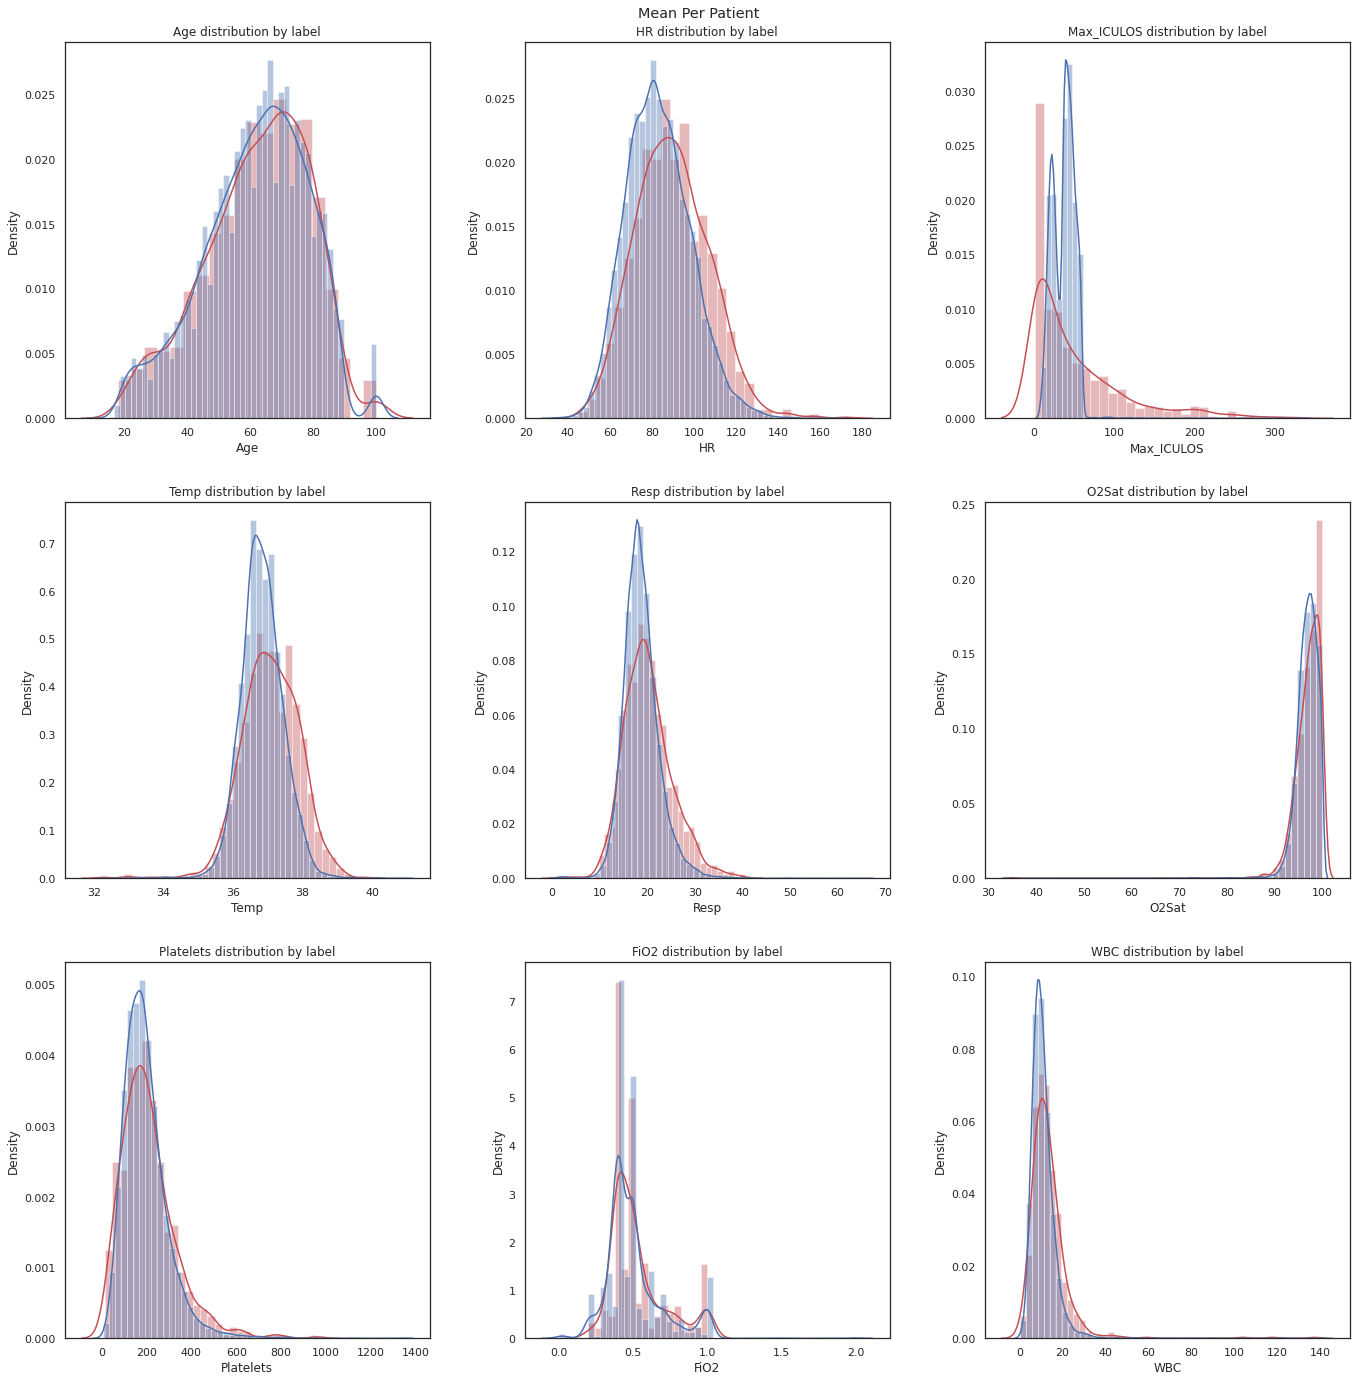

In [42]:
plot_results(3,3,['Age','HR','Max_ICULOS','Temp','Resp','O2Sat','Platelets','FiO2','WBC'],df_mean_10hr,'dist','Mean Per Patient')

In [ ]:
df[df['time_bm']>-10].columns

In [ ]:
tmp = df.copy()
tmp['Unit3'] = ( (1*(tmp['Unit1']+tmp['Unit2'])<1) |
                      (tmp['Unit1'].isna() & tmp['Unit2'].isna()) )*1
tmp['Unit1'][tmp['Unit1'].isna()] = 0
tmp['Unit2'][tmp['Unit2'].isna()] = 0
# tmp[['Unit1','Unit2','Unit3']]

aggregated_df_10h = tmp[tmp['time_bm']>-10].groupby(['ID', 'Label','Gender']).agg({
                                                        'Unit1': 'max',\
                                                        'Unit2': 'max',\
                                                        'Unit3': 'max',\
                                                        'ICULOS': 'max',\
                                                        'HR': ['median', 'max'],\
                                                        'MAP': ['median', 'min'],\
                                                        'O2Sat': ['mean'],\
                                                        'Resp': ['median', 'max'],\
                                                        'SBP': ['median', 'min'],\
                                                        'Hct': ['median', 'min'],\
                                                        'Potassium': 'mean',\
                                                        'Glucose': 'mean',\
                                                        'Temp': ['mean', 'min'],\
                                                        'DBP': 'mean',\
                                                        'WBC': ['median', 'min'],\
                                                        'EtCO2': 'mean',\
                                                        'BaseExcess': 'mean',\
                                                        'HCO3': 'mean',\
                                                        'FiO2': 'mean',\
                                                        'SaO2': 'mean',\
                                                        'AST': 'mean',\
                                                        'Lactate': 'mean',\
                                                        'var': 'mean',\
                                                        'Magnesium': 'mean',\
                                                        'Phosphate': 'mean',\
                                                        'TroponinI': 'mean',\
                                                        'Hgb': 'mean',\
                                                        'PTT': 'mean',\
                                                        'Platelets': 'mean',\
                                                        'Age': 'mean',\
                                                        'HospAdmTime': 'mean',\
                                                        # f'{window_size}w_sum_BaseExcess': 'mean',\
                                                        # f'{window_size}w_sum_FiO2': 'mean',\
                                                        # f'{window_size}w_sum_pH': 'mean',\
                                                        # f'{window_size}w_sum_PaCO2': 'mean',\
                                                        # f'{window_size}w_sum_Glucose': 'mean',\
                                                        # f'{window_size}w_sum_Lactate': 'mean',\
                                                        # f'{window_size}w_sum_PTT': 'mean'\
                                                        }).reset_index()
aggregated_df_10h.columns = ['__'.join(col).strip() for col in aggregated_df_10h.columns.values]
aggregated_df_10h.rename(columns={"ID__": "ID", "Label__": "Label", "Gender__":"Gender"}, inplace=True)

In [ ]:
aggregated_df_10h.columns

In [ ]:
plot_results(3,3,['ICULOS__max', 'HR__median', 'HR__max',\
                  'Resp__median', 'Resp__max', 'SBP__median',\
                  'WBC__median', 'WBC__min', 'O2Sat__mean',\
                  # 'Max_ICULOS','Temp','Resp','O2Sat','Platelets','FiO2','WBC'
                  ],aggregated_df_10h,'dist',figsize=(16,10))

In [ ]:
plot_results(3,1,['Unit1__max','Unit2__max','Unit3__max',\
                  # 'Max_ICULOS','Temp','Resp','O2Sat','Platelets','FiO2','WBC'
                  ],aggregated_df_10h,'dist',figsize=(12,4))

In [ ]:
missing_mean_10hr.T[list(missing_mean_10hr.T.columns)[1:]]

In [ ]:
list(missing_mean_10hr.columns)

In [ ]:
missing_mean = pd.DataFrame(df_mean[df_mean['Label']==0].notna().sum(axis = 0).sort_values(ascending=False) / len(df_mean[df_mean['Label']==0]) * 100)
missing_mean_1 = pd.DataFrame(df_mean[df_mean['Label']==1].notna().sum(axis = 0).sort_values(ascending=False) / len(df_mean[df_mean['Label']==1]) * 100)
missing_mean[1] = missing_mean_1[0]

In [ ]:
missing_mean

In [ ]:
df_mean_10hr = df[df['time_bm']>-10].groupby(by='ID').mean()

In [ ]:
missing_mean_10hr = pd.DataFrame(df_mean_10hr[df_mean_10hr['Label']==0].notna().sum(axis = 0).sort_values(ascending=False) / len(df_mean_10hr[df_mean_10hr['Label']==0]) * 100)
missing_mean_1_10hr = pd.DataFrame(df_mean_10hr[df_mean_10hr['Label']==1].notna().sum(axis = 0).sort_values(ascending=False) / len(df_mean_10hr[df_mean_10hr['Label']==1]) * 100)
missing_mean_10hr[1] = missing_mean_1_10hr[0]
missing_mean_10hr

In [ ]:
missing_mean_10hr.T[list(missing_mean_10hr.T.columns)[1:]]

In [ ]:
list(missing_mean_10hr.columns)

In [ ]:
features = list(missing[(missing[0]>80)&(missing[1]>80)].index)
non_ts_features = ['Unnamed: 0',
 'Age',
 'Max_ICULOS',
 'Label',
 'ID',
 'SepsisLabel',
 'ICULOS',
 'HospAdmTime',
 'Gender',
 'time_bm']
new_features = []
for x in features:
    if x not in non_ts_features:
        new_features.append(x)

In [ ]:
new_features

In [ ]:
df_10hr = df[df['time_bm']>=-10]
df_10hr=df_10hr[features].groupby(by=['Label','time_bm']).mean().reset_index()

In [ ]:
plot_results(2,3,new_features,std[std['Unnamed: 0']=='mean'],'dist', title='Not Null Features')

In [ ]:
plot_results(2,3,new_features,df_10hr,'ts', title='Not Null Features')

In [ ]:
df_10hr_meanp= df[df['time_bm']>=-10].groupby(by='ID').mean()
plot_results(2,3,new_features,df_10hr_meanp,'dist', title='Not Null Features')

In [ ]:
mean_by_Label = df_10hr_meanp.groupby(by='Label').mean().reset_index()
mean_by_Label[mean_by_Label['Label']==0]['HR'].values[0]

<h2> Hypothesis Testing </h2>
We will use T-Test to check if the mean feature for each patients is from the same distribution for patients that had sepsis and patients that didnt.


In [ ]:
from scipy.stats import ttest_ind
def test_new_features(tmp, type,new_features):
    diff = []
    for feature in new_features:
        if type == 'mean+std':
            sepsis =tmp[tmp['Label']['mean']==1]
            sepsis = sepsis[feature]['mean']+sepsis[feature]['std']
            sepsis = sepsis[sepsis.notna()].values
            not_sepsis =tmp[tmp['Label']['mean']==0]
            not_sepsis = not_sepsis[feature]['mean']+not_sepsis[feature]['std']
            not_sepsis = not_sepsis[not_sepsis.notna()].values
        else:
            sepsis =tmp[tmp['Label']['mean']==1]
            sepsis = sepsis[feature][type]
            sepsis = sepsis[sepsis.notna()].values
            not_sepsis =tmp[tmp['Label']['mean']==0]
            not_sepsis = not_sepsis[feature][type]
            not_sepsis = not_sepsis[not_sepsis.notna()].values
        stat,p = ttest_ind(sepsis,not_sepsis)
        # print(f'** {feature} **')
        # print(f'P-value ={p}')
        if p<0.05:
            diff.append(feature)
    return diff

In [ ]:
df[df['time_bm']>=-7].groupby(by='ID').agg(['mean','std'])['HR']

In [ ]:
diffs = {}
max_diff_len = 0
max_diff = 0
new_features = list(df.columns)[1:]
new_features =  [x for x in new_features if x not in ['ID','Label','time_bm']]
for h in range(0,20):
    print('*'*10,f'h={h}','*'*10)
    tmp_df= df[df['time_bm']>=-h].groupby(by='ID').agg(['mean','std'])
    for t in ['mean+std','mean','std']:
        diff = test_new_features(tmp_df,t,new_features)
        print(f'type={t}, number of different distributions: {len(diff)}, different distributions: {diff}')

In [ ]:
df_7hr_meanp= df[df['time_bm']>=-7].groupby(by='ID').mean()
plot_results(2,3,['HR', 'O2Sat', 'Temp', 'SBP', 'MAP'],df_7hr_meanp,'dist')

In [ ]:
map_sep = df_7hr_meanp[(df_7hr_meanp['Label']==1)&(~df_7hr_meanp['MAP'].isna())]['MAP'].values
map_not_sep = df_7hr_meanp[(df_7hr_meanp['Label']==0)&(~df_7hr_meanp['MAP'].isna())]['MAP'].values
stat,p = ttest_ind(map_sep,map_not_sep)
if p<0.05:
    print('not the same')

In [ ]:
print('h')